<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/MoreonLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

class MyLasso:
    def __init__(self, alpha=1.0, lr=0.01, max_iter=1000):
        self.alpha = alpha
        self.lr = lr
        self.max_iter = max_iter
        self.theta = None
        self.bias = 0
        self.loss_history = []

    def _compute_loss(self, X, y):
        m = X.shape[0]
        y_pred = X.dot(self.theta) + self.bias
        mse = (1/(2*m)) * np.sum((y - y_pred)**2)
        l1_penalty = self.alpha * np.sum(np.abs(self.theta))
        return mse + l1_penalty

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if y.ndim == 1:
            y = y.reshape(-1, 1)
        m, n = X.shape

        self.theta = np.zeros((n, 1))
        self.bias = 0

        for i in range(self.max_iter):
            y_pred = X @ self.theta + self.bias
            error = y_pred - y

            dtheta = (1/m) * (X.T @ error) + self.alpha * np.sign(self.theta)
            dbias = (1/m) * np.sum(error)

            self.theta -= self.lr * dtheta
            self.bias -= self.lr * dbias

            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)

    def predict(self, X):
        X = np.array(X)
        return X @ self.theta + self.bias

    def plot_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.loss_history)
        plt.title("Loss Curve")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()


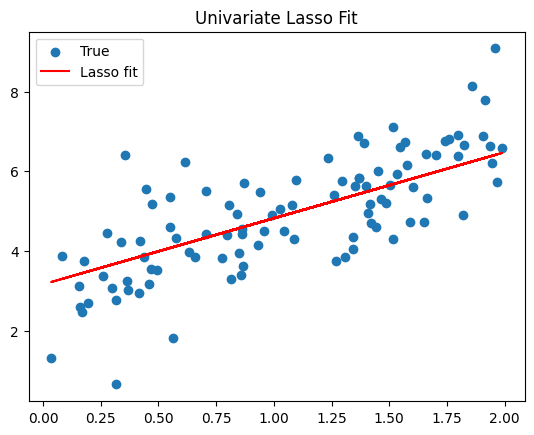

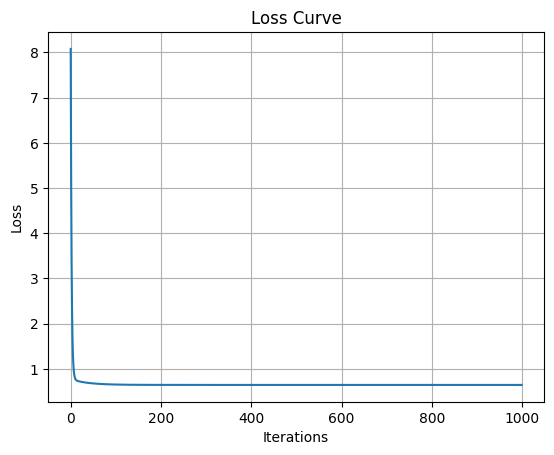

In [6]:
# Univariate
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 2 * X + 3 + np.random.randn(100, 1)

model = MyLasso(alpha=0.1, lr=0.1, max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, label="True")
plt.plot(X, y_pred, color='red', label="Lasso fit")
plt.legend()
plt.title("Univariate Lasso Fit")
plt.show()

model.plot_loss()


R2 Score: 0.4607411211593896


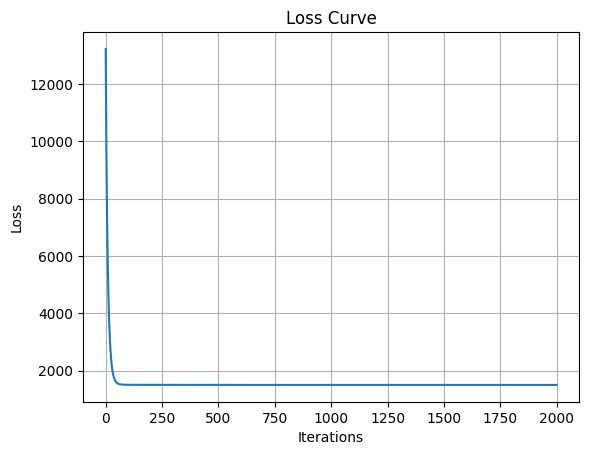

In [7]:
# Multivariate example using sklearn's diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_diabetes()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = MyLasso(alpha=0.5, lr=0.05, max_iter=2000)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))

lasso.plot_loss()


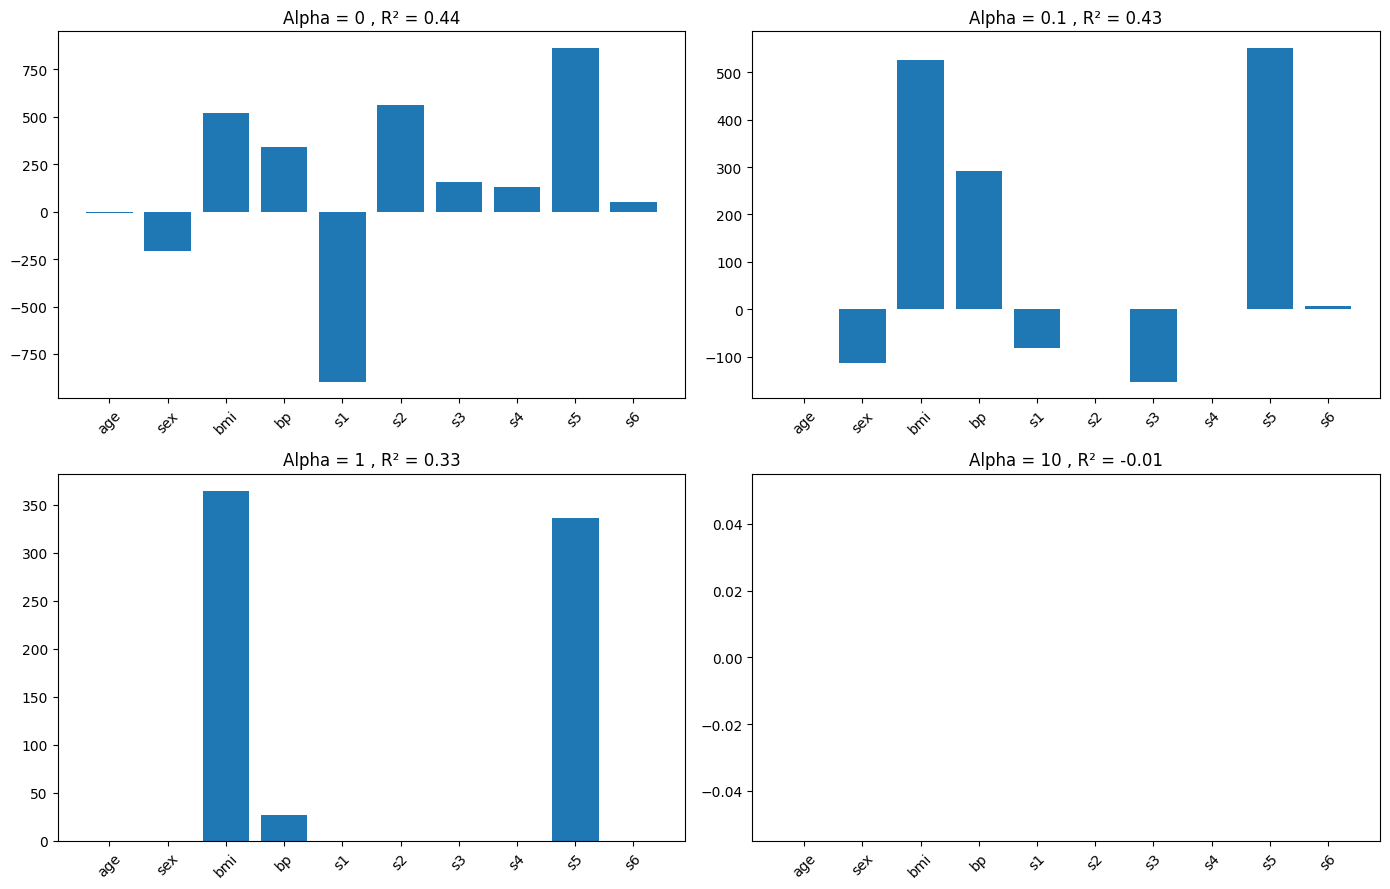

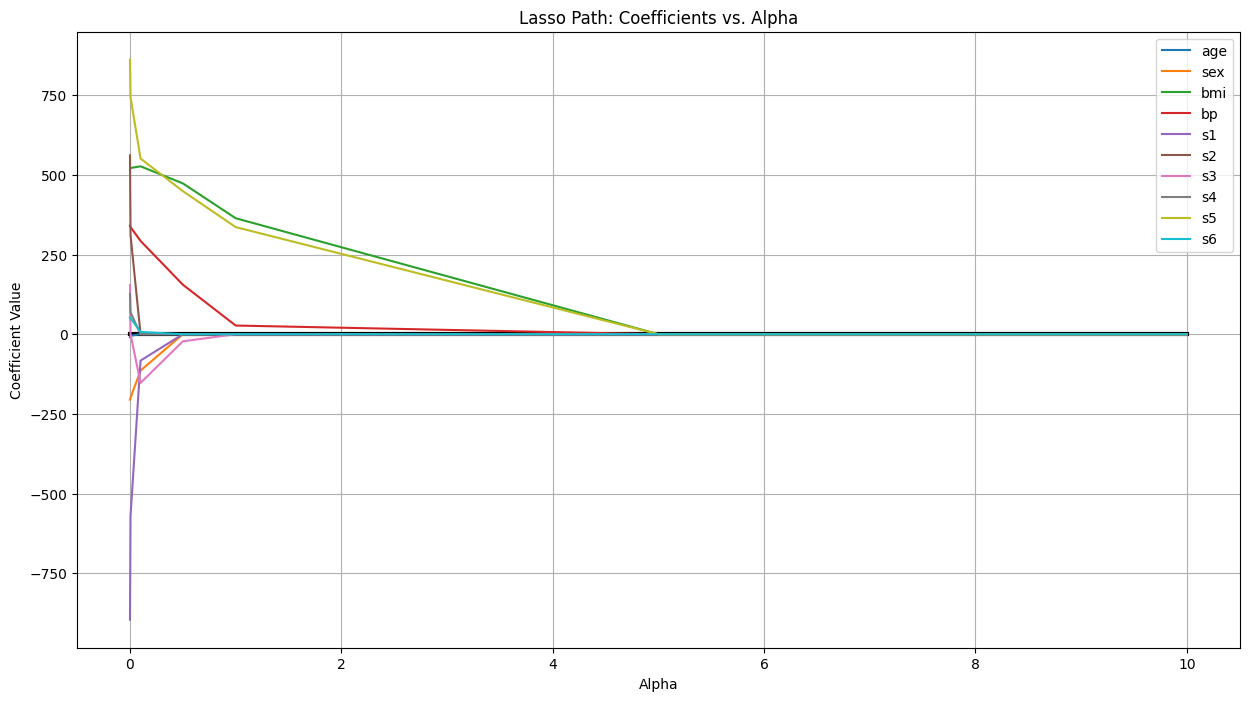

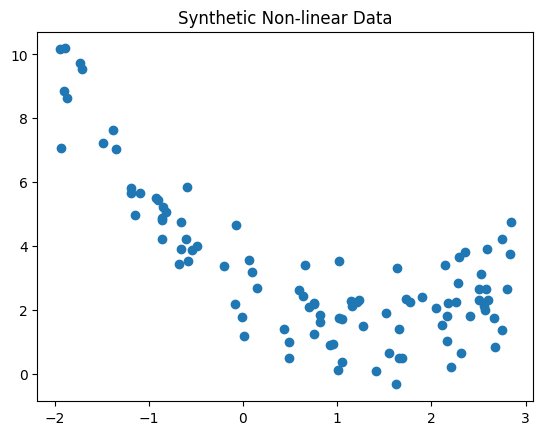

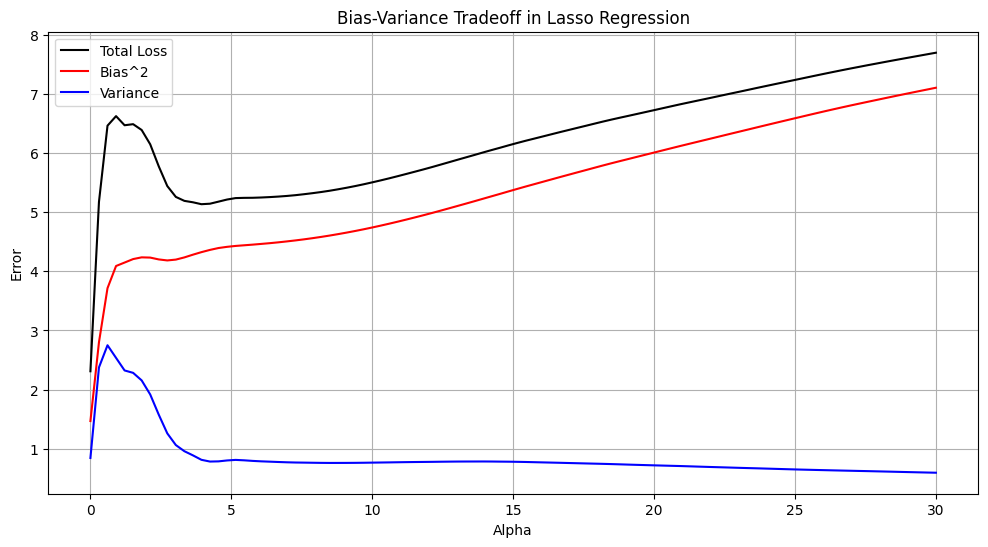

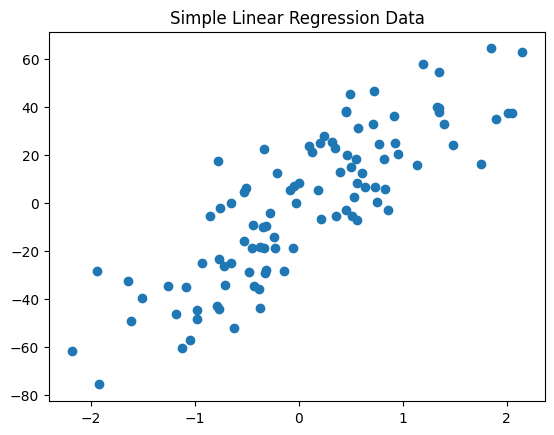

Slope (m): 27.82809103252014
Intercept (b): -2.29474455867698


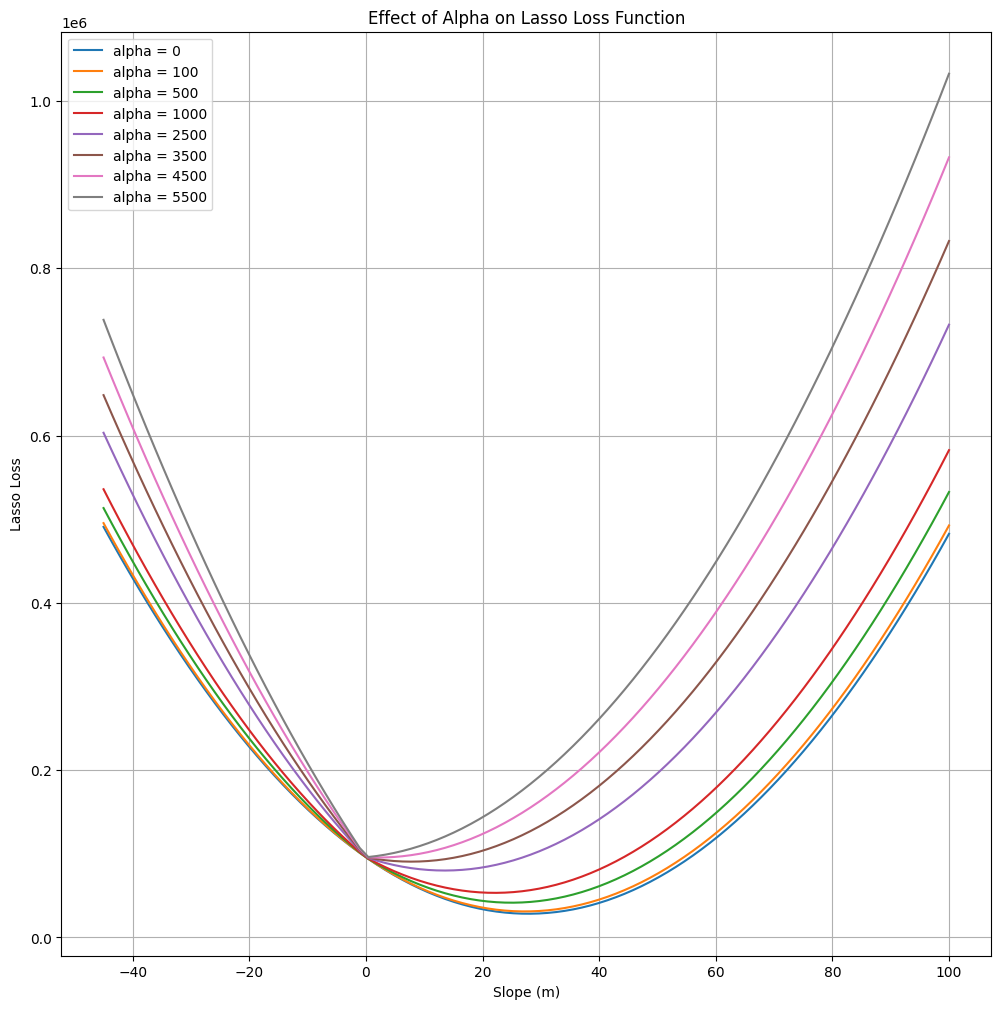

In [8]:
# 🧠 Load the diabetes dataset from sklearn.
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 📦 Import Lasso regression and evaluation metric (R² score)
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 📊 Load the dataset
data = load_diabetes()

# 🔍 Convert data to a DataFrame for better readability
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target  # Add the target (disease progression score)

# ✂️ Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.2, random_state=2)

# Store coefficients and R2 scores for different alpha values
coefs = []
r2_scores = []

# 🎯 Try different values of alpha (regularization strength)
for i in [0, 0.1, 1, 10]:
    reg = Lasso(alpha=i)     # Create a Lasso regression model with specific alpha
    reg.fit(X_train, y_train)  # Fit the model on training data

    coefs.append(reg.coef_.tolist())  # Save the model coefficients
    y_pred = reg.predict(X_test)      # Predict on test data
    r2_scores.append(r2_score(y_test, y_pred))  # Compute R² score (how well model fits)

# 📊 Visualize how coefficients change with different alpha values
plt.figure(figsize=(14, 9))

# Each subplot shows coefficient values (feature importances) for a different alpha
for idx, alpha in enumerate([0, 0.1, 1, 10]):
    plt.subplot(2, 2, idx + 1)
    plt.bar(data.feature_names, coefs[idx])
    plt.xticks(rotation=45)
    plt.title(f'Alpha = {alpha} , R² = {round(r2_scores[idx], 2)}')

plt.tight_layout()
plt.show()

# ✨ INSIGHT:
# - Alpha = 0 means no regularization (like linear regression).
# - As alpha increases, more coefficients shrink toward 0.
# - Lasso can zero out less useful features — good for feature selection.

# ➕ Try more fine-grained alpha values to observe smoother shrinkage behavior
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
coefs = []

# Fit Lasso for each alpha and save coefficients
for i in alphas:
    reg = Lasso(alpha=i, max_iter=10000)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())

# 🔄 Convert to DataFrame to inspect
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha', inplace=True)

# 📈 Plot coefficient paths (how each feature's weight changes with alpha)
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]
coefs = []

for i in alphas:
    reg = Lasso(alpha=i, max_iter=10000)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs).T  # Transpose so each row is a feature

plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=3)

for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Path: Coefficients vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

# 🔍 INSIGHT:
# - Features with less influence drop to 0 faster.
# - Strong predictors stay non-zero longer.
# - Useful to interpret which features matter most.

# ➕ Let's now understand this with a synthetic polynomial regression dataset

# 📈 Generate a nonlinear dataset
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.title("Synthetic Non-linear Data")
plt.show()

# 🔀 Split and create polynomial features
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1),
                                                    y.reshape(100),
                                                    test_size=0.2, random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# ⚖️ Use bias-variance decomposition to analyze impact of alpha
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0, 30, 100)
loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i, max_iter=10000)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)

    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

# 📊 Plot the bias-variance trade-off
plt.figure(figsize=(12, 6))
plt.plot(alphas, loss, label='Total Loss', color='black')
plt.plot(alphas, bias, label='Bias^2', color='red')
plt.plot(alphas, variance, label='Variance', color='blue')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff in Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# 🎯 INSIGHT:
# - As alpha increases, variance decreases (model is simpler).
# - But bias increases (model is too simple, underfitting).
# - Goal: Find optimal alpha that minimizes total error (bias² + variance).

# ➕ Let's now understand Lasso from a cost function perspective

# 🔧 Build a simple linear regression dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=13)

plt.scatter(X, y)
plt.title("Simple Linear Regression Data")
plt.show()

# 🔍 Train a basic linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
print("Slope (m):", reg.coef_[0])
print("Intercept (b):", reg.intercept_)

# 🧮 Define Lasso cost function manually
def cal_loss(m, alpha):
    """
    Lasso loss = squared error + L1 penalty (|m|)
    """
    return np.sum((y - m * X.ravel() + 2.29) ** 2) + alpha * abs(m)

# Prediction function
def predict(m):
    return m * X - 2.29

# 📊 Plot the loss function for different alpha values
m_vals = np.linspace(-45, 100, 100)

plt.figure(figsize=(12, 12))
for alpha in [0, 100, 500, 1000, 2500, 3500, 4500, 5500]:
    losses = [cal_loss(m, alpha) for m in m_vals]
    plt.plot(m_vals, losses, label=f'alpha = {alpha}')

plt.xlabel('Slope (m)')
plt.ylabel('Lasso Loss')
plt.title('Effect of Alpha on Lasso Loss Function')
plt.legend()
plt.grid(True)
plt.show()

# 🧠 FINAL INSIGHTS:
# - Lasso regression **penalizes large coefficients** with L1 norm.
# - It performs **automatic feature selection** by forcing some weights to zero.
# - As alpha increases:
#   - ➕ Bias ↑
#   - ➖ Variance ↓
#   - 🧹 Model becomes simpler, possibly at the cost of underfitting
# - Choose `alpha` using cross-validation (e.g., `LassoCV` in sklearn)
